# Relative Timestamp
This notebook aim is to test the creation of the timestamp (relative) based on the real timestamp. We also consider the selection of a specfic range of the database

In [19]:
from dtwinpylib.dtwinpy.interfaceDB import Database
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin
import sqlite3
import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) #reload this specifc module to upadte the class


<module 'dtwinpylib.dtwinpy.Digital_Twin' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\Digital_Twin.py'>

Populate a digital database and run sync just to create the real database

<span style='color:#7DCEA0'>Digital Twin '5s_determ' created sucessfully at 13 March 13:53:22</span>

--- printing databases paths ---
Digital Database: 'databases/5s_determ/digital_database.db'
Real Database: 'databases/5s_determ/real_database.db'
ID Database: 'databases/5s_determ/ID_database.db'
### ============ Simulation Started ============ ###
Time: 7597 - [Conveyor towards Queue 3] GOT Part 12
Time: 7597 - [Machine 1] got Part 13 from Queue 1 (capacity= 0)
Time: 7797 - [Conveyor towards Queue 3] PUT Part 12 in the Queue 3
Time: 7798 - [Conveyor towards Queue 4] GOT Part 11
Time: 7798 - [Machine 3] got Part 12 from Queue 3 (capacity= 0)
Time: 7898 - [Conveyor towards Queue 4] PUT Part 11 in the Queue 4
Time: 7899 - [Machine 4] got Part 11 from Queue 4 (capacity= 0)
Time: 10899 - [Conveyor towards Queue 5] GOT Part 11
Time: 10999 - [Conveyor towards Queue 5] PUT Part 11 in the Queue 5
Time: 11000 - [Machine 5] got Part 11 from Queue 5 (capacity= 0)
Time: 13000 - [Terminator] xxx Part 11 terminated xxx
Time: 13000 - [Terminator] Part 14 replaced
Time: 13000 - [Conveyor towards Queu

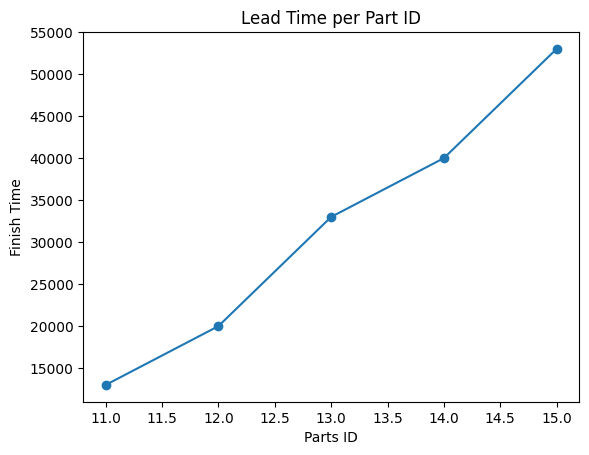

- Maximum Cycle Time: 33000
- Minimum Cycle Time: 13000
>>> Average system cycle time: 25200.0 [time unit]***


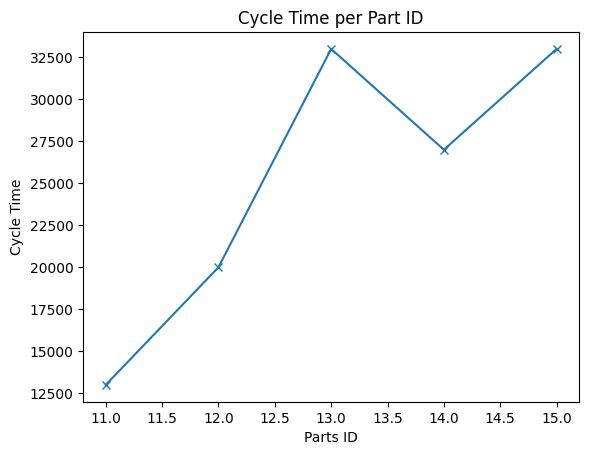

>>> System Throughput: 9.433962264150943e-05 [parts / time unit] 
==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 13
Queue Lenght: 1
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 12 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being pro

InterfaceError: Error binding parameter 0 - probably unsupported type.

<Figure size 640x480 with 0 Axes>

In [7]:
mydt = Digital_Twin(name= "5s_determ", copied_realDB= True,)
mydt.run_digital_model(plot= True, verbose= False, maxparts= 5)
mydt.run_sync(start_time=0, end_time= 20000)

Take the database path

In [6]:
database_path = mydt.real_database_path

Copy data from timestamp to timestamp_real

In [10]:
with sqlite3.connect(database_path) as db:
    db.execute("UPDATE real_log SET timestamp_real = timestamp")
    db.execute("UPDATE real_log SET timestamp = ?", (0,))
    db.commit

Clear the column timestamp

In [22]:
with sqlite3.connect(database_path) as db:
    db.execute("UPDATE real_log SET timestamp = ?", (None,))
    db.commit

In [23]:
import sqlite3

# Connect to the database
conn = sqlite3.connect(mydt.real_database_path)
cursor = conn.cursor()

# Select the rows in the table with timestamp_real in the desired range
start_time = 20000
end_time = 30000
rows = cursor.execute("SELECT * FROM real_log WHERE timestamp_real >= ? AND timestamp_real <= ?", (start_time, end_time)).fetchall()

# Loop through the selected rows and update the timestamp column with relative values
start_timestamp = rows[0][-1]  # Assumes the timestamp_real column is the second column
for row in rows:
    timestamp_real = row[-1]  # Assumes the timestamp_real column is the second column
    relative_timestamp = timestamp_real - start_timestamp
    cursor.execute("UPDATE real_log SET timestamp = ? WHERE timestamp_real = ?", (relative_timestamp, timestamp_real))

# Commit the changes and close the database connection
conn.commit()
conn.close()


# Updating the Start Time

In [15]:
from dtwinpylib.dtwinpy.interfaceDB import Database
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin
import sqlite3
import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) #reload this specifc module to upadte the class
import shutil


In [12]:
mydt = Digital_Twin(name= '5s_determ', maxparts= 20)
mydt.run_digital_model(plot= False, verbose= False)

<span style='color:#7DCEA0'>Digital Twin '5s_determ' created sucessfully at 14 March 11:59:12</span>

--- printing databases paths ---
Digital Database: 'databases/5s_determ/digital_database.db'
Real Database: 'databases/5s_determ/real_database.db'
ID Database: 'databases/5s_determ/ID_database.db'
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 1 (capacity= 4)
Time: 10000 - [Conveyor towards Queue 2] GOT Part 1
Time: 10000 - [Machine 1] got Part 2 from Queue 1 (capacity= 3)
Time: 10200 - [Conveyor towards Queue 2] PUT Part 1 in the Queue 2
Time: 10201 - [Machine 2] got Part 1 from Queue 2 (capacity= 0)
Time: 20000 - [Conveyor towards Queue 3] GOT Part 2
Time: 20000 - [Machine 1] got Part 3 from Queue 1 (capacity= 2)
Time: 20200 - [Conveyor towards Queue 3] PUT Part 2 in the Queue 3
Time: 20201 - [Conveyor towards Queue 4] GOT Part 1
Time: 20201 - [Machine 3] got Part 2 from Queue 3 (capacity= 0)
Time: 20301 - [Conveyor towards Queue 4] PUT Part 1 in the Queue 4
Time: 20302 - [Machine 4] got Part 1 from Queue 4 (capacity= 0)
Time: 23302 -

In [32]:
import sqlite3

def get_start_time(db_file, table_name, start_time, end_time):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Check for the most recent 'started' activity_type before the original start time
    cursor.execute(f"""
        SELECT event_id, timestamp_real
        FROM {table_name}
        WHERE timestamp_real < ?
        AND activity_type = 'Started'
        ORDER BY timestamp_real DESC
        LIMIT 1
    """, (start_time,))

    row = cursor.fetchone()

    if row is not None:
        # If there is, return the timestamp_real and line id of the 'started' activity_type as the new start time
        new_start_time = row[1]
        line_id = row[0]
    else:
        # If there is no 'started' activity_type before the original start time, use the original start time and set line id to None
        new_start_time = start_time
        line_id = None

    conn.close()

    return new_start_time, line_id


In [4]:
digital_path = mydt.database_path
real_path = "databases/5s_determ/real_database.db"
shutil.copy2(digital_path, real_path)


In [16]:
database_path = mydt.database_path
mydb = Database(database_path= real_path, copied_realDB=True, event_table= 'real_log')